<a href="https://colab.research.google.com/github/nguyenhuynhtu11/CreditCard_Churn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [6]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing Part 1

In [7]:
# Check the number of unique value
df.select_dtypes(include = 'object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [8]:
# Drop RowNumber, CustomerId, Surname and HasCrCard because its unnecessary
df.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# Exploratory Data Analysis

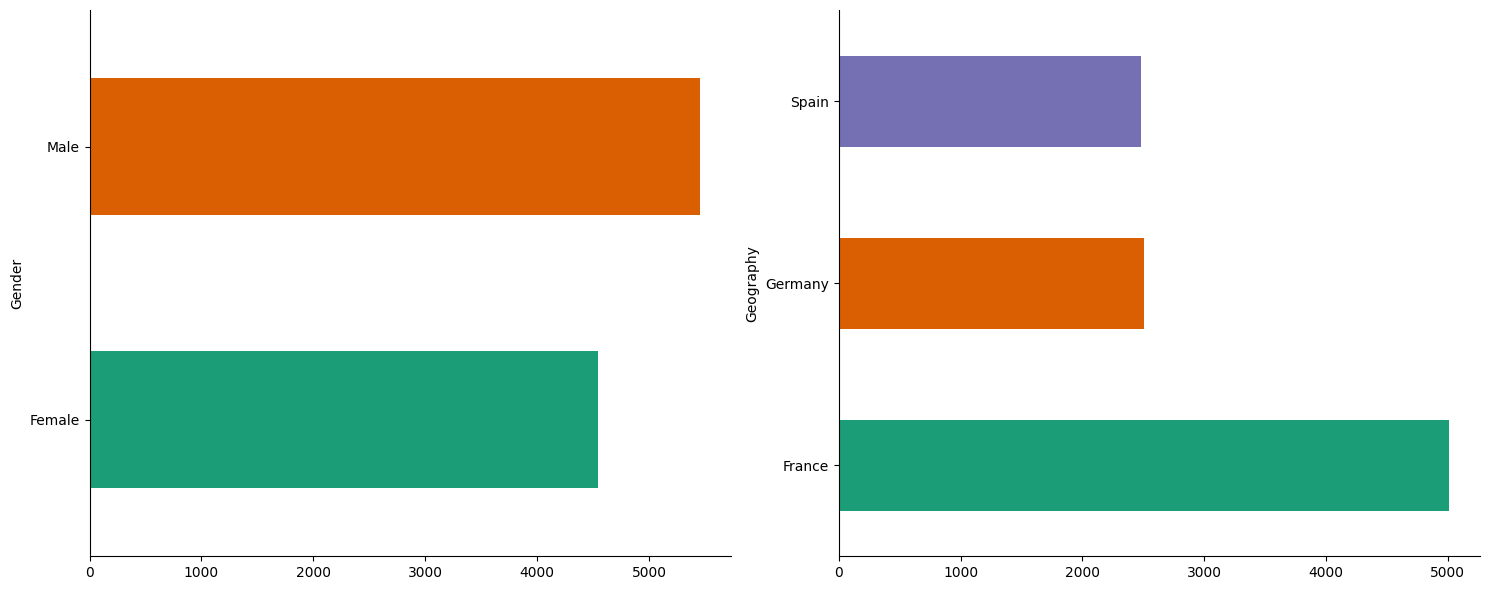

In [9]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Geography']
def cat_plot(col):
  df.groupby(col).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a chart grid for each categorical variable
plt.figure(figsize=(15, 6))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 2, i)
    cat_plot(var)

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()

In [ ]:
# List of numerical variables to plot
num_vars = ["CreditScore", "Age", "Tenure", "Balance","NumOfProducts", "IsActiveMember","EstimatedSalary","Exited"]
